# 1、导入数据

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')   #应用风格
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

In [2]:
df=pd.read_csv('CNKI.csv',encoding='gbk')
df.head()

,Title-题名,Author-作者,Organ-单位,Source-文献来源,Keyword-关键词,Summary-摘要,PubTime-发表时间
0,应用金融科技创新服务小微企业的途径与机制研究,李慧;,中国工商银行股份有限公司天津市分行;,第三十四届中国（天津）2020’IT、网络、信息技术、电子、仪器仪表创新学术会议论文集,融资困境;;金融科技;;小微企业,"近些年来,人工智能、区块链、云计算和大数据成为了各行各业的焦点,传统金融业包括商业银行在内,...",2020-08-17
1,金融科技研究进展与评析,鲁钊阳;张珂瑞;,西南政法大学经济学院;,金融理论与实践,金融科技;;金融创新;;金融发展,"从历史的角度来看,金融科技的产生是数百年来技术变革的必然产物,大数据、区块链、云计算、人工智...",2020-08-12
2,打造科技创新引擎 赋能业务价值创造,陈满才;,中国工商银行金融科技部;,中国金融电脑,云计算平台;物联网;人工智能技术;普惠金融发展;服务实体经济;工作体制机制;产学研用;银行业...,"当前,金融科技已逐渐从后台走向前台,成为推动金融转型升级的新引擎、金融服务实体经济的新途径、...",2020-08-07
3,新兴技术创新应用重塑金融服务 助力金融业数字化战略转型,赵希同;,中国银行信息科技部;,中国金融电脑,监管效能;新兴技术;区块链;差异化优势;容错纠错机制;数字化转型;创新应用;金融业;银行业;...,"面对金融竞争的新常态,商业银行要顺势而为、及时转型,利用新兴技术撬动金融创新,构建以客户为中...",2020-08-07
4,"发力新技术创新,为金融服务注入新动能",寇冠;,中信银行信息技术管理部;,中国金融电脑,中信银行;技术服务平台;物联网;平台体系;科技创新工作;区块链;人工智能;供应链金融;数字货...,"中信银行秉承""新技术驱动、价值导向""的科技创新理念,兼顾互联网""快""和银行""稳""的特点,重点...",2020-08-07


## 2、作者计数统计

根据作着排序结果如下：


,Title-题名,Author-作者,Organ-单位,Source-文献来源,Keyword-关键词,Summary-摘要,PubTime-发表时间,数量
74,金融科技创新服务小微企业融资研究综述与展望,周雷;蔡佩瑶;刘婧;刘睿;,苏州市职业大学商学院;上海远想会计师事务所;东南大学经济管理学院;,市场周刊,金融科技;;小微企业;;融资;;区块链;;金融创新,"随着区块链、人工智能、大数据等前沿技术与金融业的深度融合,金融科技迅速发展,为解决小微企业融...",2020-04-01,15
351,金融科技创新支持小微企业融资案例研究,周雷;刘睿;黄思涵;,苏州市职业大学商学院;东南大学经济管理学院;,Proceedings of 2019 International Conference o...,金融科技;;小微企业;;融资;;互联网金融;;大数据,"金融科技的发展为解决小微企业融资这一""世界性难题""提供了新途径。作为国家开发银行的创新试点,...",2019-05-26,15
63,金融科技服务小微企业融资案例研究——以国开行旗下“开鑫贷”平台为例,周雷;刘睿;张璇;,苏州市职业大学商学院;东南大学数学学院;,金融理论与教学,金融科技;;小微企业;;融资;;互联网金融;;大数据,"小微企业融资是金融服务实体经济的薄弱环节,而金融科技的发展为破解小微金融""痛点""提供了新途径...",2020-04-25,15
188,综合金融服务体系服务实体经济高质量发展研究——以苏州市小微企业数字征信实验区为例,周雷;刘睿;金吉鸿;,苏州市职业大学商学院;苏州市地方金融监督管理局;,征信,金融服务平台;;实体经济;;高质量发展;;金融科技;;数字征信;;小微企业,"为破解民营小微企业融资的信息不对称难题,服务实体经济高质量发展,江苏省苏州市搭建了综合金融服...",2019-11-18,15
850,金融科技带动银行网点智能化,本刊编辑部;,时代金融,时代金融,银行网点;影像识别;,"金融科技发展迅猛,国内银行越来越多地用更好的金融基础设施为更多用户提供高效率的服务。依托人工...",2017-08-10,12


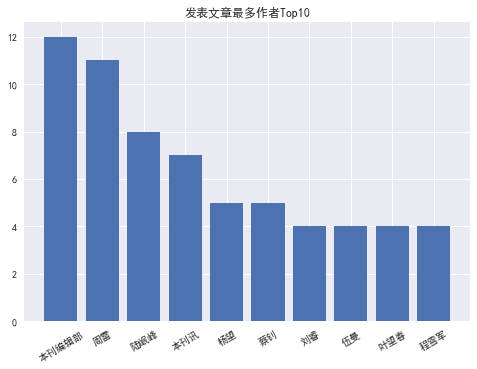

In [25]:
keywords={}
exponet=[]#每篇文章各个关键词出现次数之和，排序依据
for keys in df['Author-作者']:
    key_list=keys.split(';')
    for key in key_list:
        if key=='':
            continue
        if key in keywords:
            keywords[key]+=1
        else:
            keywords[key]=1

keywords=dict(sorted(keywords.items(),key=lambda x:x[1],reverse=True)[:10])
plt.title('发表文章最多作者Top10')
plt.bar(keywords.keys(),keywords.values())
plt.xticks(rotation=30)
#排序DataFrame
for keys in df['Author-作者']:
    score=0
    for key in keys.split(';'):
        try:
            score+=keywords[key]
        except:
            pass
    exponet.append(score)
df['数量']=exponet
df=df.sort_values(by='数量',ascending=False)
print("根据作着排序结果如下：")
df.head()

## 3、发表时间统计

In [4]:
#将发表时间列转时间序列
df=df.sort_values(by='PubTime-发表时间',ascending=False)
df.head()

,Title-题名,Author-作者,Organ-单位,Source-文献来源,Keyword-关键词,Summary-摘要,PubTime-发表时间,数量
0,应用金融科技创新服务小微企业的途径与机制研究,李慧;,中国工商银行股份有限公司天津市分行;,第三十四届中国（天津）2020’IT、网络、信息技术、电子、仪器仪表创新学术会议论文集,融资困境;;金融科技;;小微企业,"近些年来,人工智能、区块链、云计算和大数据成为了各行各业的焦点,传统金融业包括商业银行在内,...",2020-08-17,0
1,金融科技研究进展与评析,鲁钊阳;张珂瑞;,西南政法大学经济学院;,金融理论与实践,金融科技;;金融创新;;金融发展,"从历史的角度来看,金融科技的产生是数百年来技术变革的必然产物,大数据、区块链、云计算、人工智...",2020-08-12,0
3,新兴技术创新应用重塑金融服务 助力金融业数字化战略转型,赵希同;,中国银行信息科技部;,中国金融电脑,监管效能;新兴技术;区块链;差异化优势;容错纠错机制;数字化转型;创新应用;金融业;银行业;...,"面对金融竞争的新常态,商业银行要顺势而为、及时转型,利用新兴技术撬动金融创新,构建以客户为中...",2020-08-07,0
4,"发力新技术创新,为金融服务注入新动能",寇冠;,中信银行信息技术管理部;,中国金融电脑,中信银行;技术服务平台;物联网;平台体系;科技创新工作;区块链;人工智能;供应链金融;数字货...,"中信银行秉承""新技术驱动、价值导向""的科技创新理念,兼顾互联网""快""和银行""稳""的特点,重点...",2020-08-07,0
5,聚焦科技创新 智造数字光大,史晨阳;,中国光大银行信息科技部;,中国金融电脑,光大银行;科技创新机制;云计算平台;智能服务;研发平台;金融科技创新;分布式架构;数字化转型...,"逆水行舟,不进则退。面对新时代复杂的内外部经济形势,光大银行将坚定战略发展定力,稳中求进,积...",2020-08-07,0


# 4、绘制折线图

Text(0,0.5,'文章累计数')

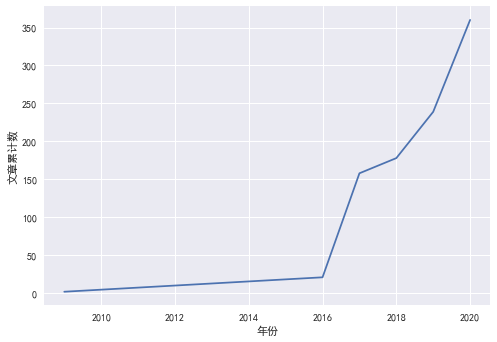

In [86]:
dates=pd.to_datetime(df['PubTime-发表时间'])
year_num=dates.map(lambda x:x.year).value_counts()
year_num.index=year_num.index.sort_values(ascending=False)
year_num.plot()
plt.xlabel('年份')
plt.ylabel('文章累计数')

Text(0,0.5,'文章累计数')

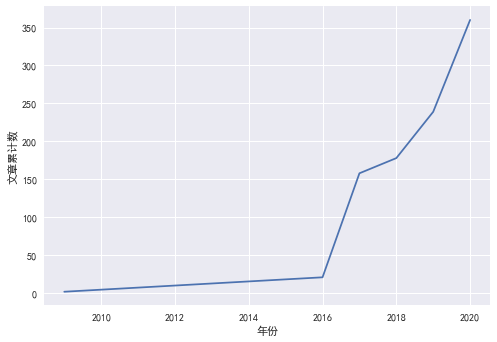

2009    360
2016    239
2017    178
2018    158
2019     21
2020      2
Name: PubTime-发表时间, dtype: int64

In [119]:
s='status=0,1,2&begin_time=1563084688&end_time=1563766460'
for i in s.split('&'):
    print(i.split('=')[0]+':'+i.split('=')[1])

status:0,1,2
begin_time:1563084688
end_time:1563766460
